# Food type comparison by nutrients  

In this notebook I will provide a visualization of how food types relate to each other. The goal is to see if there are foods of plant source that could replace those of animal source. 4 groups of foods are analyzed: {'vegetable', 'fruit', 'fish', 'beef'}  2 plant and animal sources.     

In the first part I use a library to merge dataframes containing foods' nutrition features. The source of this data is on: https://ndb.nal.usda.gov/ndb/ . The function df_droc processes the t-SNE dimensionality reduction and outputs a dataframe with 2 dimensions and merges a group food dataframes keeping shared columns and discarding everything else.  


In [33]:
import pandas as pd
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import imp
import sys
sys.path.insert(0, 'PyLib')

#Library to merge dataframes and show a tSNE image
import df_proc
imp.reload(df_proc)
from df_proc import *

# Prepare Dataset

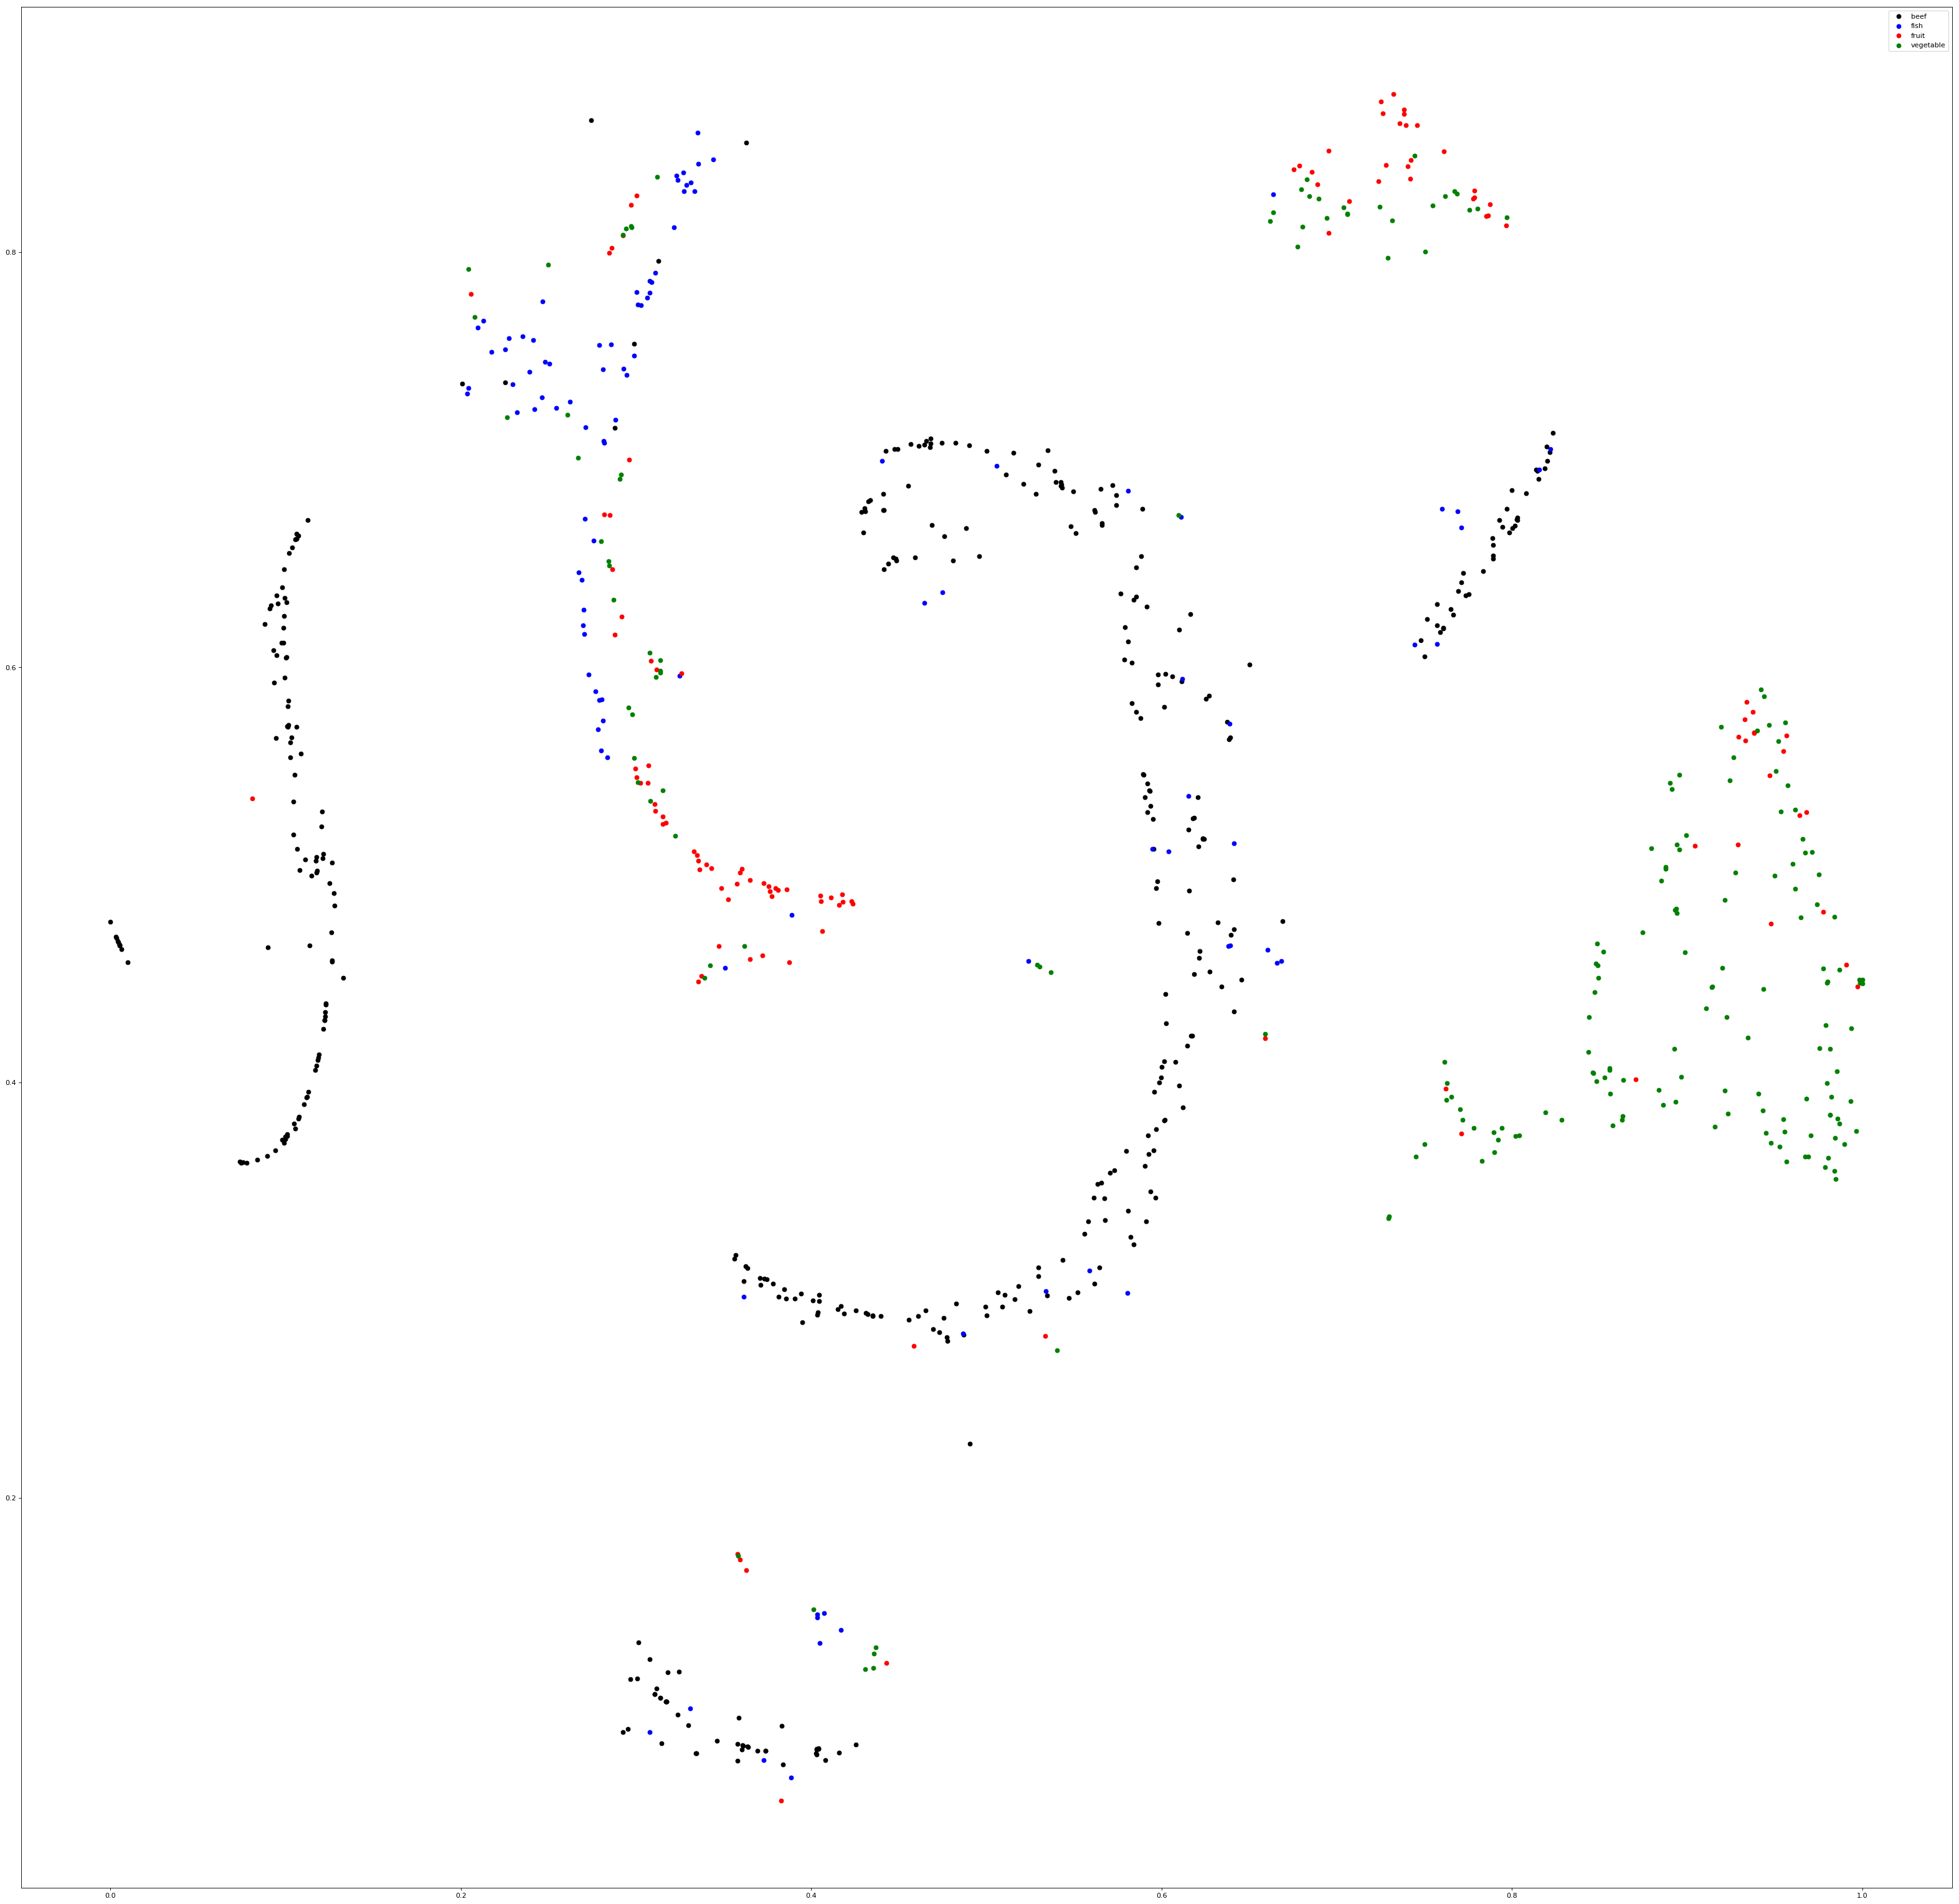

In [5]:
csvDir='CSVs'
beef_df=pd.read_csv(csvDir+'/'+'beef_df_100g.csv',sep=',',index_col=0)
fish_df=pd.read_csv(csvDir+'/'+'finfish_shellfish_df_100g.csv',sep=',',index_col=0)
veg_df=pd.read_csv(csvDir+'/'+'vegetables_df_100g.csv',sep=',',index_col=0)
fruit_df=pd.read_csv(csvDir+'/'+'fruits_df_100g.csv',sep=',',index_col=0)
dfL=[beef_df,fish_df,fruit_df,veg_df]
typesL=['beef','fish','fruit','vegetable']
colorL=['black','blue','red','green']
#colorL=['black','blue','red','green']
dataDic=combineDfs(iDfL=dfL,typesL=typesL,colorL=colorL,figSize=(50,50),iDpi=80,plotText=False)

In [20]:
print(dataDic.keys(),"\n")
food_small_df = dataDic['df']
print("Food types and number of nutrients to be compared: \n",food_small_df.shape,"\n")
print("Nutrients names: \n",food_small_df.columns.values,"\n")
print('Food types to be analyzed: \n',set(food_small_df['type']),'\n')

dict_keys(['tsne', 'df']) 

Food types and number of nutrients to be compared: 
 (835, 10) 

Nutrients names: 
 ['Proximates Water g' 'Proximates Energy kcal' 'Proximates Energy kJ'
 'Proximates Protein g' 'Proximates Total lipid (fat) g' 'Proximates Ash g'
 'Proximates Carbohydrate, by difference g' 'Minerals Calcium, Ca mg'
 'Minerals Iron, Fe mg' 'type'] 

Food types to be analyzed: 
 {'vegetable', 'fruit', 'fish', 'beef'} 



In the plot, 7 clusters appear to be visible

## Use Kmeans to visualize clusters

In [55]:
data_4_tsne = dataDic['tsne']
kmeans = KMeans(init='k-means++', n_clusters=7)
kmeans.fit(data_4_tsne)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

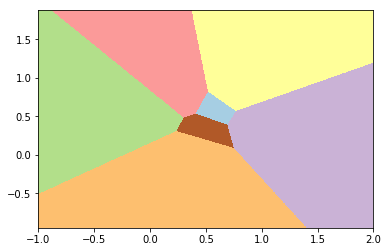

In [56]:
h= 0.002
x_min, x_max = data_4_tsne[0].min() - 1, data_4_tsne[0].max() + 1
y_min, y_max = data_4_tsne[1].min() - 1, data_4_tsne[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,aspect='auto', origin='lower')
plt.show()

Since the clusters provided by kmeans don't reflect the visible clusters we proceed to use DBSCAN

# DBSCAN for clustering

Total clusters: {0, 1, 2, 3, 4, 5, 6}


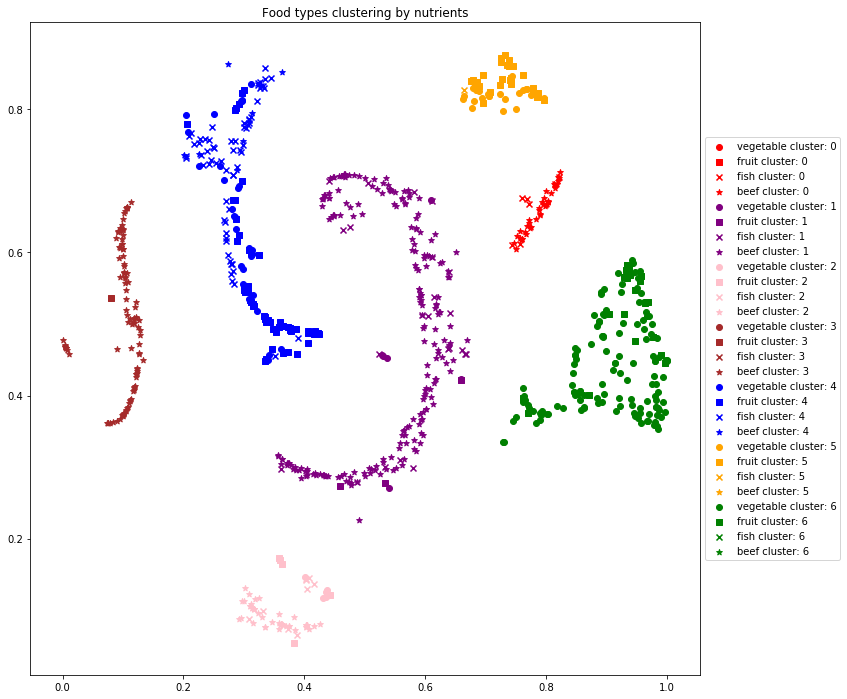

In [89]:
#Tun DBSCAN to show 7 clusters
db = DBSCAN(eps=0.09, min_samples=10).fit(data_4_tsne.values)
tot_lab = set(db.labels_)
print('Total clusters:',tot_lab)
clustering_labels = pd.DataFrame({'cluster':db.labels_},index=food_small_df.index)
food_types = set(food_small_df['type'])
tsne_small_class_cluster = pd.concat((data_4_tsne,food_small_df['type'],clustering_labels),axis=1)

#tsne_small_class_cluster[['cluster','type']].groupby(['cluster','type']).count()
fig = plt.figure(figsize=(12,12))
colors=['red','purple','pink','brown','blue','orange','green']
markers={'vegetable':'o', 'fruit':'s', 'fish':'x', 'beef':'*'}
for cluster in tot_lab:
    xyc = tsne_small_class_cluster[tsne_small_class_cluster['cluster']==cluster]
    for food_class in set(tsne_small_class_cluster['type']):
        xy = xyc[xyc['type']==food_class][[0,1]]
        plt.scatter(xy[0],xy[1],color=colors[cluster],marker=markers[food_class],label=food_class+' cluster: '+str(cluster))
plt.title('Food types clustering by nutrients')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#fig = plt.figure(figsize=(10,10))
#tsne_small_class_cluster[[0,1,'cluster']].plot.hexbin(0,1)
#plt.show()


## Observations, conclusions

As we could see, there are some foods of plant & animal source that share clusters. Nonetheless, there are 7 clusters of foods, almost the double of food sources and almost four times the amount of origin types (animal, plant). Thus, there are some plant source foods that could be eaten instead of a comparatively similar animal food, nonetheless, the variety is so wide, that there isn't a replacement for every animal source food with a plant source, in the analysis.

# References

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN  
http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py  


In [ ]:
#all_foods_df=pd.read_csv('all_foods_df_100g.csv',sep=',',index_col=0)
#print('Analysis of more food types, food variety and nutrients: \n',all_foods_df.shape)